In [28]:
import pandas as pd
import numpy as np
import time
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import keys

In [2]:
auth = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)
auth.set_access_token(keys.access_token, keys.access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
def followers_id_to_csv(screen_name, page=20):
    followers_id = []
    for page in tweepy.Cursor(api.followers_ids, screen_name=screen_name).pages(page):
        followers_id.extend(page)
    df = pd.DataFrame(followers_id, columns=['follower_ID'])
    df.to_csv(f'data/{screen_name}_followers_id.csv', index = False)

In [92]:
# screen_names = ['realDonaldTrump','VP', 'UnfollowTrump','senatemajldr','JoeBiden','SenKamalaHarris','SpeakerPelosi']
# for name in screen_names:
#     followers_id_to_csv(name)

In [7]:
# load lists of follower IDs to DF
realDonaldTrump_followers_id = pd.read_csv('data/realDonaldTrump_followers_id.csv')
UnfollowTrump_followers_id = pd.read_csv('data/UnfollowTrump_followers_id.csv')
VP_followers_id = pd.read_csv('data/VP_followers_id.csv')
senatemajldr_followers_id = pd.read_csv('data/senatemajldr_followers_id.csv')
JoeBiden_followers_id = pd.read_csv('data/JoeBiden_followers_id.csv')
SenKamalaHarris_followers_id = pd.read_csv('data/SenKamalaHarris_followers_id.csv')
SpeakerPelosi_followers_id = pd.read_csv('data/SpeakerPelosi_followers_id.csv')

In [9]:
def follower_user_df_to_pickle(follower_ids,screen_name):
    followers_user_objects = []
    for i in range(0, len(follower_ids), 100):
        followers_user_objects.extend(api.lookup_users(follower_ids[i:i+100]))
    df = pd.DataFrame(followers_user_objects, columns=['user'])
    df.to_pickle(f'data/user_object/{screen_name}_followers_user.pkl')

In [23]:
# save user objects df to pickle 

# follower_user_df_to_pickle(list(realDonaldTrump_followers_id.follower_ID),'realDonaldTrump')
# follower_user_df_to_pickle(list(UnfollowTrump_followers_id.follower_ID),'UnfollowTrump')
# follower_user_df_to_pickle(list(VP_followers_id.follower_ID),'VP')
# follower_user_df_to_pickle(list(senatemajldr_followers_id.follower_ID),'senatemajldr')
# follower_user_df_to_pickle(list(JoeBiden_followers_id.follower_ID),'JoeBiden')
# follower_user_df_to_pickle(list(SenKamalaHarris_followers_id.follower_ID),'SenKamalaHarris')
# follower_user_df_to_pickle(list(SpeakerPelosi_followers_id.follower_ID),'SpeakerPelosi')

Read user objects from pickle into dataframe

In [122]:
# realDonaldTrump_followers_user = pd.read_pickle('data/user_object/realDonaldTrump_followers_user.pkl')
UnfollowTrump_followers_user = pd.read_pickle('data/user_object/UnfollowTrump_followers_user.pkl')
# VP_followers_user = pd.read_pickle('data/user_object/VP_followers_user.pkl')
# senatemajldr_followers_user = pd.read_pickle('data/user_object/senatemajldr_followers_user.pkl')
# JoeBiden_followers_user = pd.read_pickle('data/user_object/JoeBiden_followers_user.pkl')
# SenKamalaHarris_followers_user = pd.read_pickle('data/user_object/SenKamalaHarris_followers_user.pkl')
# SpeakerPelosi_followers_user = pd.read_pickle('data/user_object/SpeakerPelosi_followers_user.pkl')

In [34]:
def fill_follower_user_df(df_original):
    df = df_original.copy()
    df['created_at'] = df['user'].apply(lambda x : x.created_at)
    df['id'] = df['user'].apply(lambda x : x.id)
    df['follower_count'] = df['user'].apply(lambda x : x.followers_count)
    df['friends_count'] = df['user'].apply(lambda x : x.friends_count)
    df['statuses_count'] = df['user'].apply(lambda x : x.statuses_count)
    df['favourites_count'] = df['user'].apply(lambda x : x.favourites_count)
    df.pop('user')
    return df

In [123]:
# realDonaldTrump_followers_info = fill_follower_user_df(realDonaldTrump_followers_user)
# UnfollowTrump_followers_info = fill_follower_user_df(UnfollowTrump_followers_user)

In [38]:
def get_first_digit_of_counts(df_original):
    df = df_original.copy()
    df['first_digit_follower_count'] = df['follower_count'].apply(lambda x : int(str(x)[0]))
    df['first_digit_friends_count'] = df['friends_count'].apply(lambda x : int(str(x)[0]))
    df['first_digit_statuses_count'] = df['statuses_count'].apply(lambda x : int(str(x)[0]))
    df['first_digit_favourites_count'] = df['favourites_count'].apply(lambda x : int(str(x)[0]))
    return df

In [39]:
realDonaldTrump_first_digit = get_first_digit_of_counts(realDonaldTrump_followers_user_info)

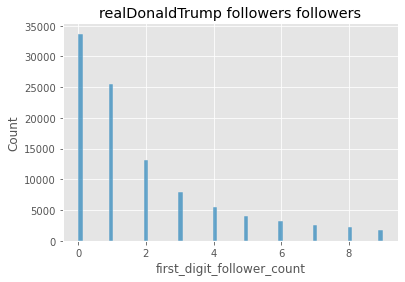

In [45]:
sns.histplot(realDonaldTrump_first_digit.first_digit_follower_count)
plt.title('realDonaldTrump follower''s followers');

In [62]:
trump_follower_dg = np.array(realDonaldTrump_first_digit.first_digit_follower_count)
total_non_0 = len(trump_follower_dg[trump_follower_dg != 0])
trump_follower_dg_no_0 = trump_follower_dg[trump_follower_dg != 0]

In [56]:
num_1 = len(trump_follower_dg[trump_follower_dg == 1])
num_1_percent = num_1/total_non_0
num_1_percent

0.38618728540529096

In [ ]:
from benfordslaw import benfordslaw
bl = benfordslaw(alpha=0.05)

In [88]:
d_array_no_0 = realDonaldTrump_first_digit['follower_count'].loc[realDonaldTrump_first_digit['follower_count'] != 0].values
d_array = realDonaldTrump_first_digit['follower_count'].values

<ipython-input-129-9f1f70b2c198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digits[digits == 1] = 10


[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=3837.64


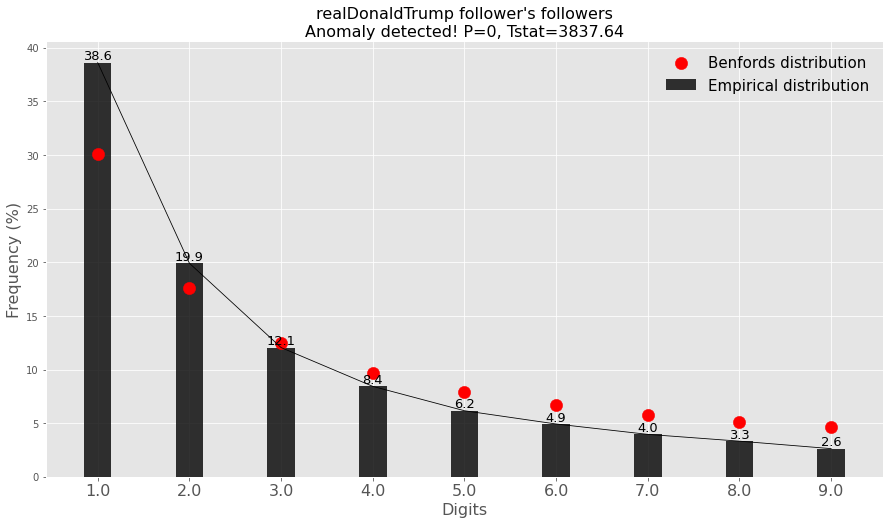

In [129]:
digits = realDonaldTrump_first_digit.follower_count
digits[digits == 1] = 10
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s followers');

[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=4562.13


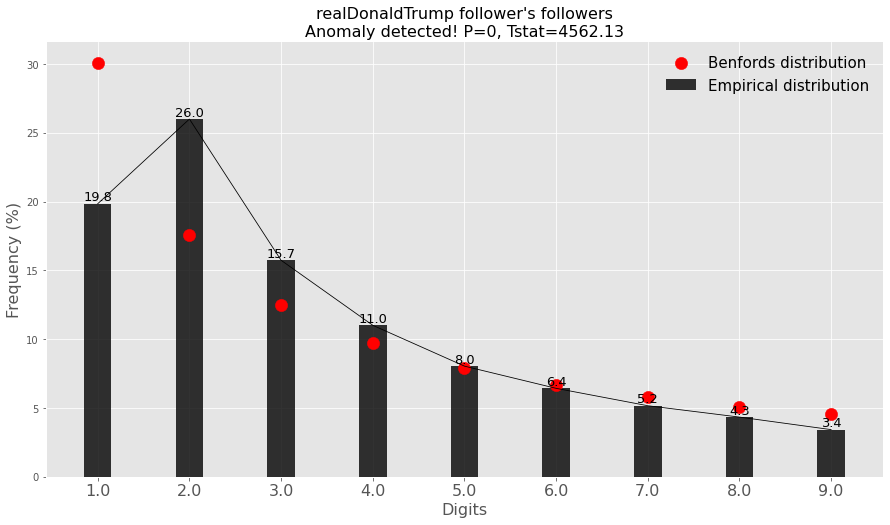

In [120]:
digits = realDonaldTrump_first_digit.follower_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s followers');

[benfordslaw] >[chi2] Anomaly detected! P=1.5842e-31, Tstat=164.799


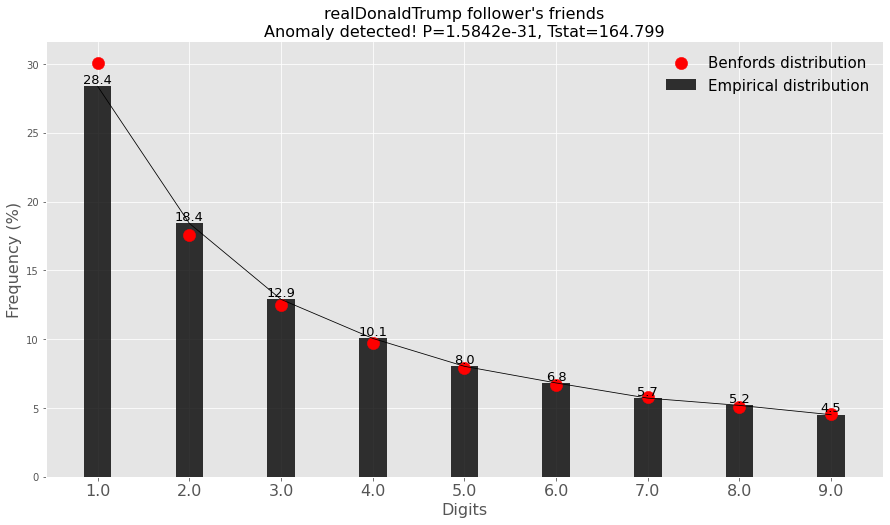

In [119]:
digits = realDonaldTrump_first_digit.friends_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s friends');

[benfordslaw] >[chi2] Anomaly detected! P=8.47397e-271, Tstat=1278.92


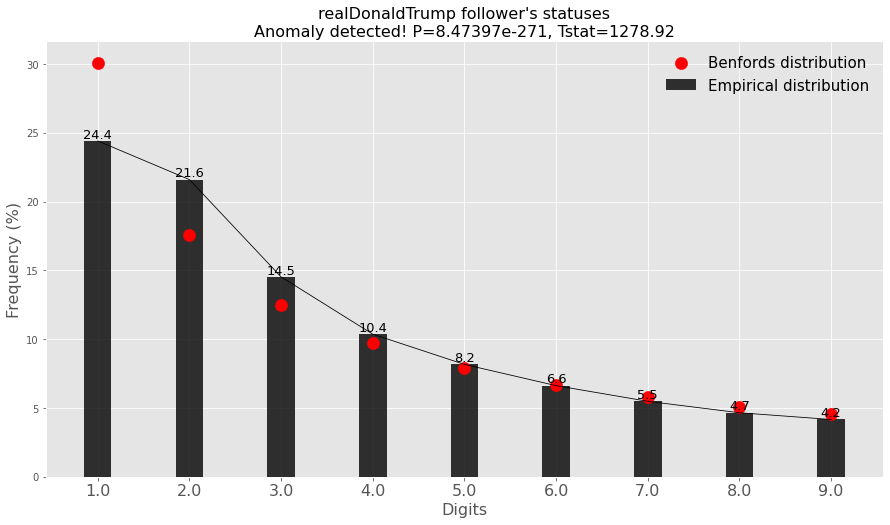

In [118]:
digits = realDonaldTrump_first_digit.statuses_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s statuses');

[benfordslaw] >[chi2] Anomaly detected! P=2.05065e-204, Tstat=971.562


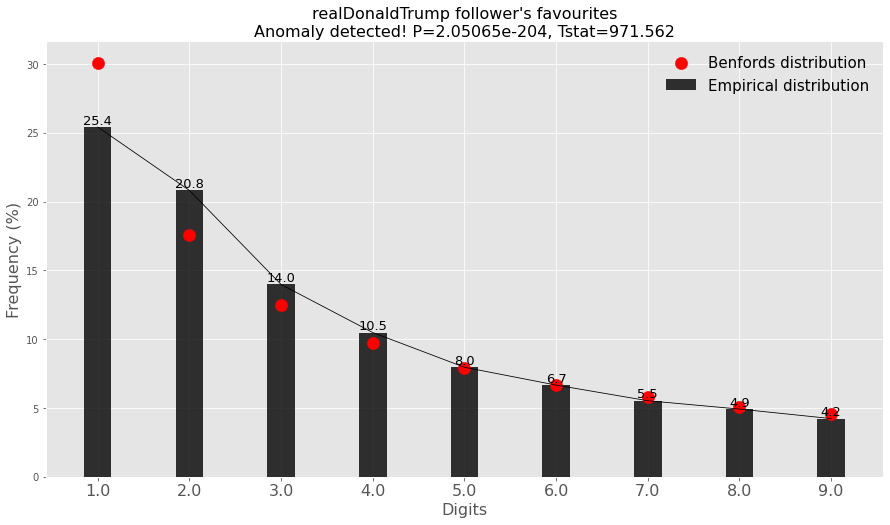

In [121]:
digits = realDonaldTrump_first_digit.favourites_count
results = bl.fit(digits)
bl.plot(title='realDonaldTrump follower\'s favourites');

In [112]:
len(a[a==2]) / len(a)

0.1

[benfordslaw] >[chi2] Anomaly detected! P=1.35321e-33, Tstat=174.67


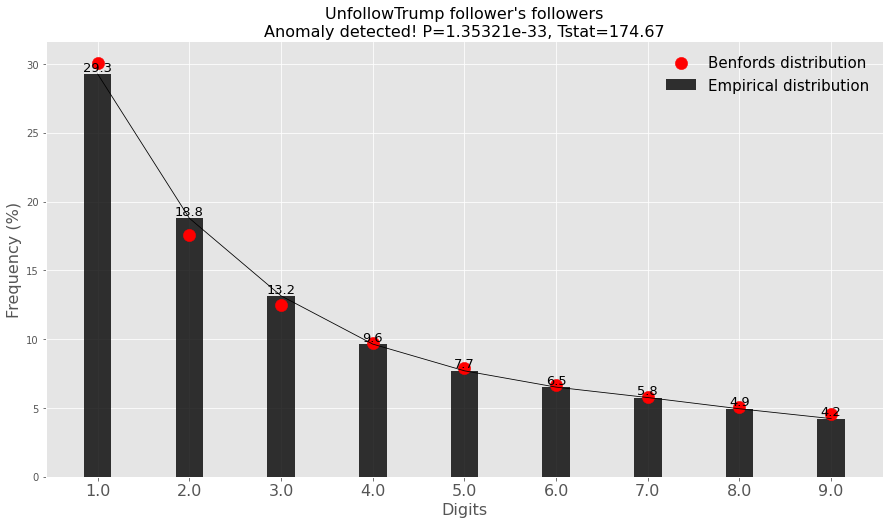

In [126]:
digits = UnfollowTrump_followers_user_info.follower_count
results = bl.fit(digits)
bl.plot(title='UnfollowTrump follower\'s followers');

[benfordslaw] >[chi2] Anomaly detected! P=4.77925e-188, Tstat=895.7


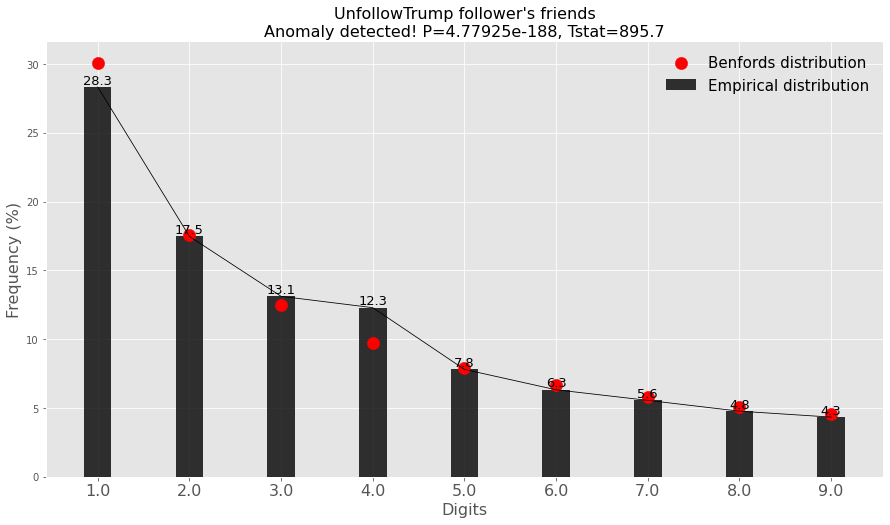

In [128]:
digits = UnfollowTrump_followers_user_info.friends_count
results = bl.fit(digits)
bl.plot(title='UnfollowTrump follower\'s friends');

[benfordslaw] >[chi2] No anomaly detected. P=0.909435, Tstat=3.36467


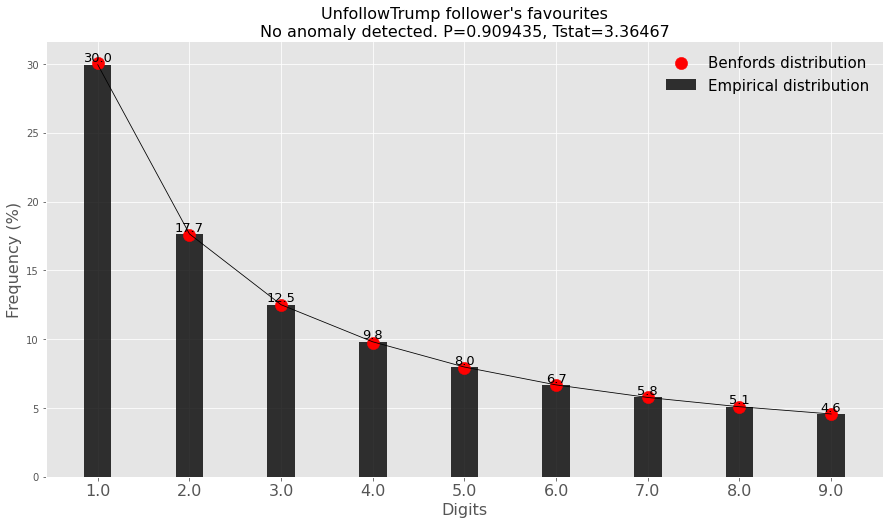

In [124]:
digits = UnfollowTrump_followers_user_info.favourites_count
results = bl.fit(digits)
bl.plot(title='UnfollowTrump follower\'s favourites');